# 彩色图像的直方图均衡

## 按通道分别进行均衡

   对图像R,G,B三个通道分别均衡化，然后将三个通道合在一起形成均衡后的图像。
   优点是算法简单，缺点是算法可能会改变色调。

In [11]:
from skimage import io,img_as_float,color
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 511.5, 511.5, -0.5)

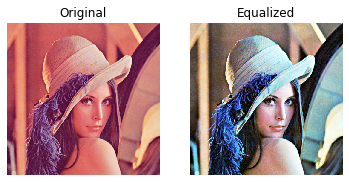

In [12]:
img = io.imread('images/lenna_rgb.jpg')
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.axis('off')
height = img.shape[0]
width  = img.shape[1]

count_b = np.zeros(256, np.float) # 因为是概率, 有可能是浮点数
count_g = np.zeros(256, np.float)
count_r = np.zeros(256, np.float)


# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]

        index_b = int(b)
        index_g = int(g)
        index_r = int(r)

        count_b[index_b] = count_b[index_b] + 1
        count_g[index_g] = count_g[index_g] + 1
        count_r[index_r] = count_r[index_r] + 1

total = height * width # 总像素个数
count_b =  count_b / total  # 计算概率
count_g =  count_g / total
count_r =  count_r / total

# 计算累计概率
sum_b = sum_g = sum_r = float(0)
for i in range(256):
    sum_b += count_b[i]
    count_b[i] = sum_b # 计算出累积概率

    sum_g += count_g[i]
    count_g[i] = sum_g

    sum_r += count_r[i]
    count_r[i] = sum_r

# 计算映射表
mapl_b = np.uint16(255 * count_b)
mapl_g = np.uint16(255 * count_g)
mapl_r = np.uint16(255 * count_r)

# 将图像进行映射
dst = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]
        b = mapl_b[b]
        g = mapl_g[g]
        r = mapl_r[r]

        dst[i, j] = (b, g, r)

plt.subplot(122)
plt.imshow(dst)
plt.title("Equalized")
plt.axis('off')

## 仅对亮度通道进行均衡
   为防止颜色变化，可将图像转换为HSV空间，然后仅对V通道进行均衡，最后再变换回到RGB空间

(-0.5, 511.5, 511.5, -0.5)

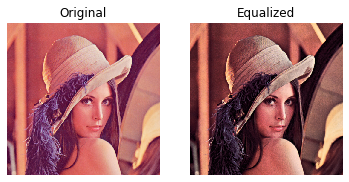

In [14]:
img = io.imread('images/lenna_rgb.jpg')
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.axis('off')
height = img.shape[0]
width  = img.shape[1]

hsv = color.rgb2hsv(img)  #转换后V的取值在0-1之间
count_v = np.zeros(256, np.float) 

# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):
        v = hsv[i, j][2] * 255

        index_v = int(v)
        count_v[index_v] = count_v[index_v] + 1

total = height * width      # 总像素个数
count_v =  count_v / total  # 计算概率


# 计算累计概率
sum_v = float(0)
for i in range(256):
    sum_v += count_v[i]
    count_v[i] = sum_v # 计算出累积概率

# 计算映射表
mapl_v = count_v

# 将图像进行映射
dst = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        hsv[i,j][2] = mapl_v[int(hsv[i,j][2]*255)]

dst = color.hsv2rgb(hsv)

plt.subplot(122)
plt.imshow(dst)
plt.title("Equalized")
plt.axis('off')

## 基于通道平均直方图进行均衡

统计图像R,G,B三个通道的直方图，然后对直方图进行平均，利用平均直方图构建均衡函数，最后用均衡函数对RGB三个通道进行均衡。

(-0.5, 511.5, 511.5, -0.5)

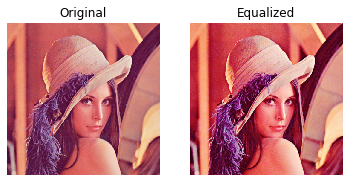

In [16]:
mg = io.imread('images/lenna_rgb.jpg')
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.axis('off')
height = img.shape[0]
width  = img.shape[1]

count_b = np.zeros(256, np.float) # 因为是概率, 有可能是浮点数
count_g = np.zeros(256, np.float)
count_r = np.zeros(256, np.float)


# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]

        index_b = int(b)
        index_g = int(g)
        index_r = int(r)

        count_b[index_b] = count_b[index_b] + 1
        count_g[index_g] = count_g[index_g] + 1
        count_r[index_r] = count_r[index_r] + 1

total = height * width # 总像素个数
count_b =  count_b / total  # 计算概率
count_g =  count_g / total
count_r =  count_r / total

count_average = (count_b + count_g + count_r) / 3.0
# 计算累计概率
sum_average  =  float(0)
for i in range(256):
    sum_average += count_average[i]
    count_average[i] = sum_average # 计算出累积概率

# 计算映射表
mapl_average = np.uint16(255 * count_average)

# 将图像进行映射
dst = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        (b, g, r) = img[i, j]
        b = mapl_average[b]
        g = mapl_average[g]
        r = mapl_average[r]

        dst[i, j] = (b, g, r)

plt.subplot(122)
plt.imshow(dst)
plt.title("Equalized")
plt.axis('off')